# Online retail transactions.

**Objective:** 
Build a customer clustering model that can be used by the online retailer to employ a more customer centric marketing approach.

In [31]:
# importing all necessary libraries

import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# machine learning algorithms


# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# word cloud libraries
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Plot the Figures Inline
%matplotlib inline

# Get data

In [32]:
# import the online retailer transactions data
df = pd.read_excel('online_retail_II.xlsx')

In [33]:
# get a count of the data
df.shape

(525461, 8)

In [34]:
# let look peak at our data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [35]:
# check feature datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


# Explore data

In [36]:
# create a copy of our original dataset
retail = df.copy()

In [37]:
retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [38]:
# check for missing values
def missing_perc(data):
    perc = round(data.isnull().sum().sort_values(ascending =False)/(len(data)) * 100, 2)
    return perc

In [39]:
# check the percentage of missing values in each column of our data
missing_perc(retail)

Customer ID    20.54
Description     0.56
Country         0.00
Price           0.00
InvoiceDate     0.00
Quantity        0.00
StockCode       0.00
Invoice         0.00
dtype: float64

In [40]:
# describe the numeric colums
retail.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [41]:
# Before we proceed with feature exploration we create a new column called InvoiceValue (Quantity * Price)
retail['InvValue'] = retail['Quantity'] * retail['Price']

### Data Visualization

Lets view and explore each column in our data individually.

**Feature: Stockcode**

In [42]:
# total number of unique stock items
retail['StockCode'].nunique()

4632

**Feature: Description**

In [43]:
# total number of unique item descriptions
retail['Description'].nunique()

4681

In [44]:
# create a word cloud of the most occurring words / phrases in our product description
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate(str(retail['Description']))

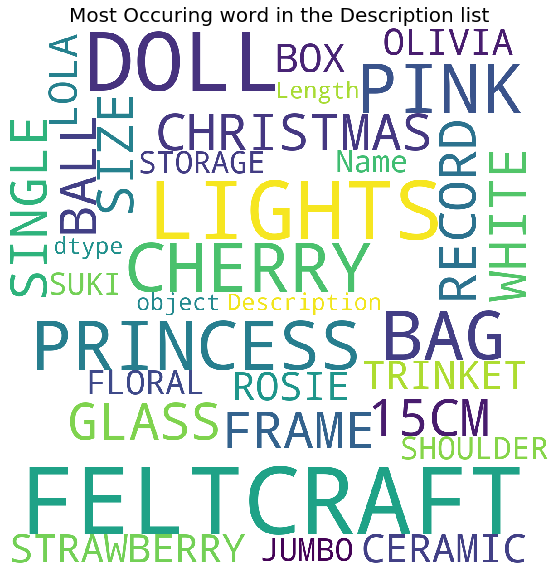

In [45]:
print(wordcloud)
plt.rcParams['figure.figsize'] = (10, 10)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

**Feature: Quantity**

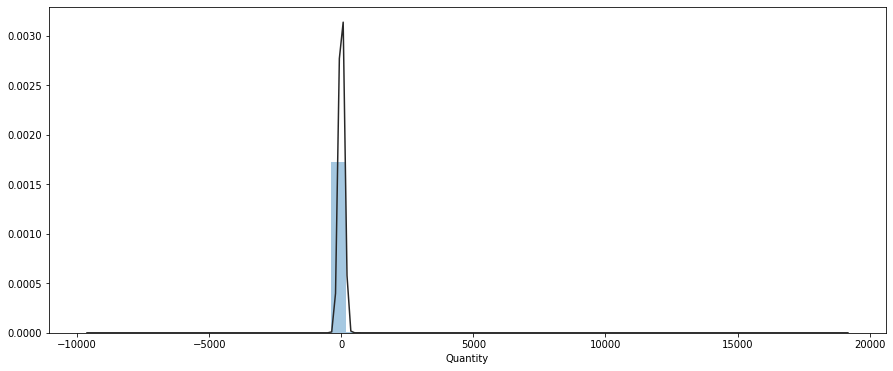

In [46]:
#check our quantity per transaction distribution.
plt.figure(figsize=(15,6))
sns.distplot(retail['Quantity'], fit=norm, kde=False)

**Feature: Invoice date**

In [47]:
# before exploration create a few new features
retail['InvoiceTime'] = retail['InvoiceDate'].dt.time
retail['InvoiceDate'] = retail['InvoiceDate'].dt.date

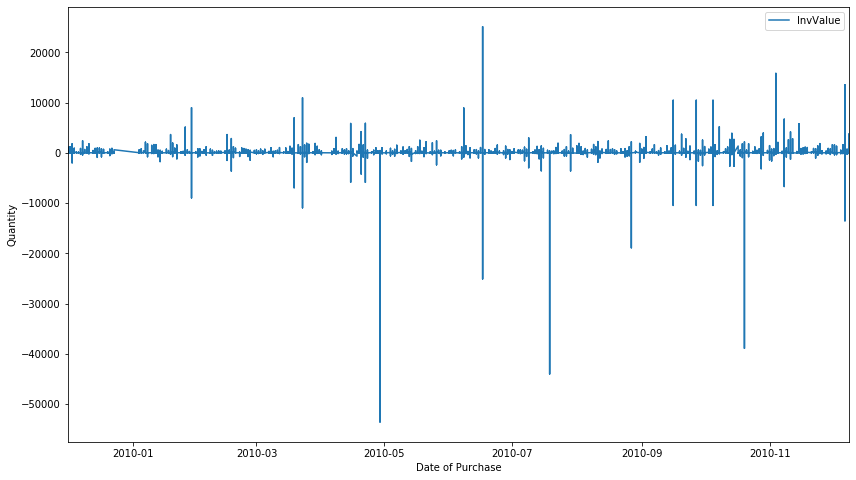

In [49]:
# transactions per date
plt.rcParams['figure.figsize'] = (14, 8)
retail.plot(x = 'InvoiceDate', y = 'InvValue')
plt.xlabel('Date of Purchase')
plt.ylabel('Quantity')
plt.show()

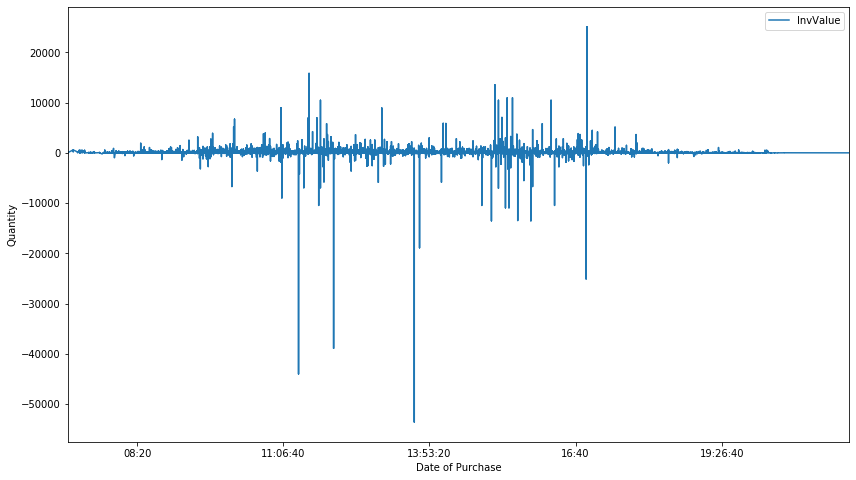

In [50]:
plt.rcParams['figure.figsize'] = (14, 8)
retail.plot(x = 'InvoiceTime', y = 'InvValue')
plt.xlabel('Date of Purchase')
plt.ylabel('Quantity')
plt.show()